# Graph coloring through constraint programming - Google-OR Tools
Particularly we will be using the CP solver of Google-OR tools

In this assignment you will design an algorithm to find the smallest coloring of a graph. You are
provided with a graph and your task is to label the graph’s nodes with as few colors as possible
such that all pairs of nodes joined by an edge do not have the same color. 

Note: This is a problem taken from my Discrete Optimization course from coursera.Although this solution provides the information at a comprehensive level on how to use the Google-OR tools. But this code dont provide the optimal or near optimal 
exact solution requirement inorder to submit this code for your coursera credit. Apologise! I twisted my code and improved. 
    

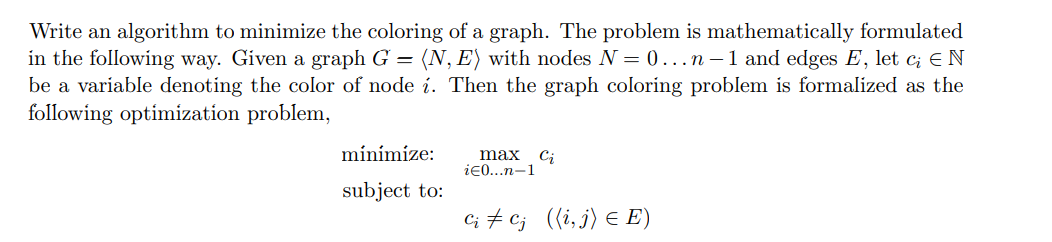

In [2]:
from IPython.display import Image
Image(filename='C:/Users/per35/Pictures/graph.png',width=700, height=700)

The sample output of this code can be visualized as below:

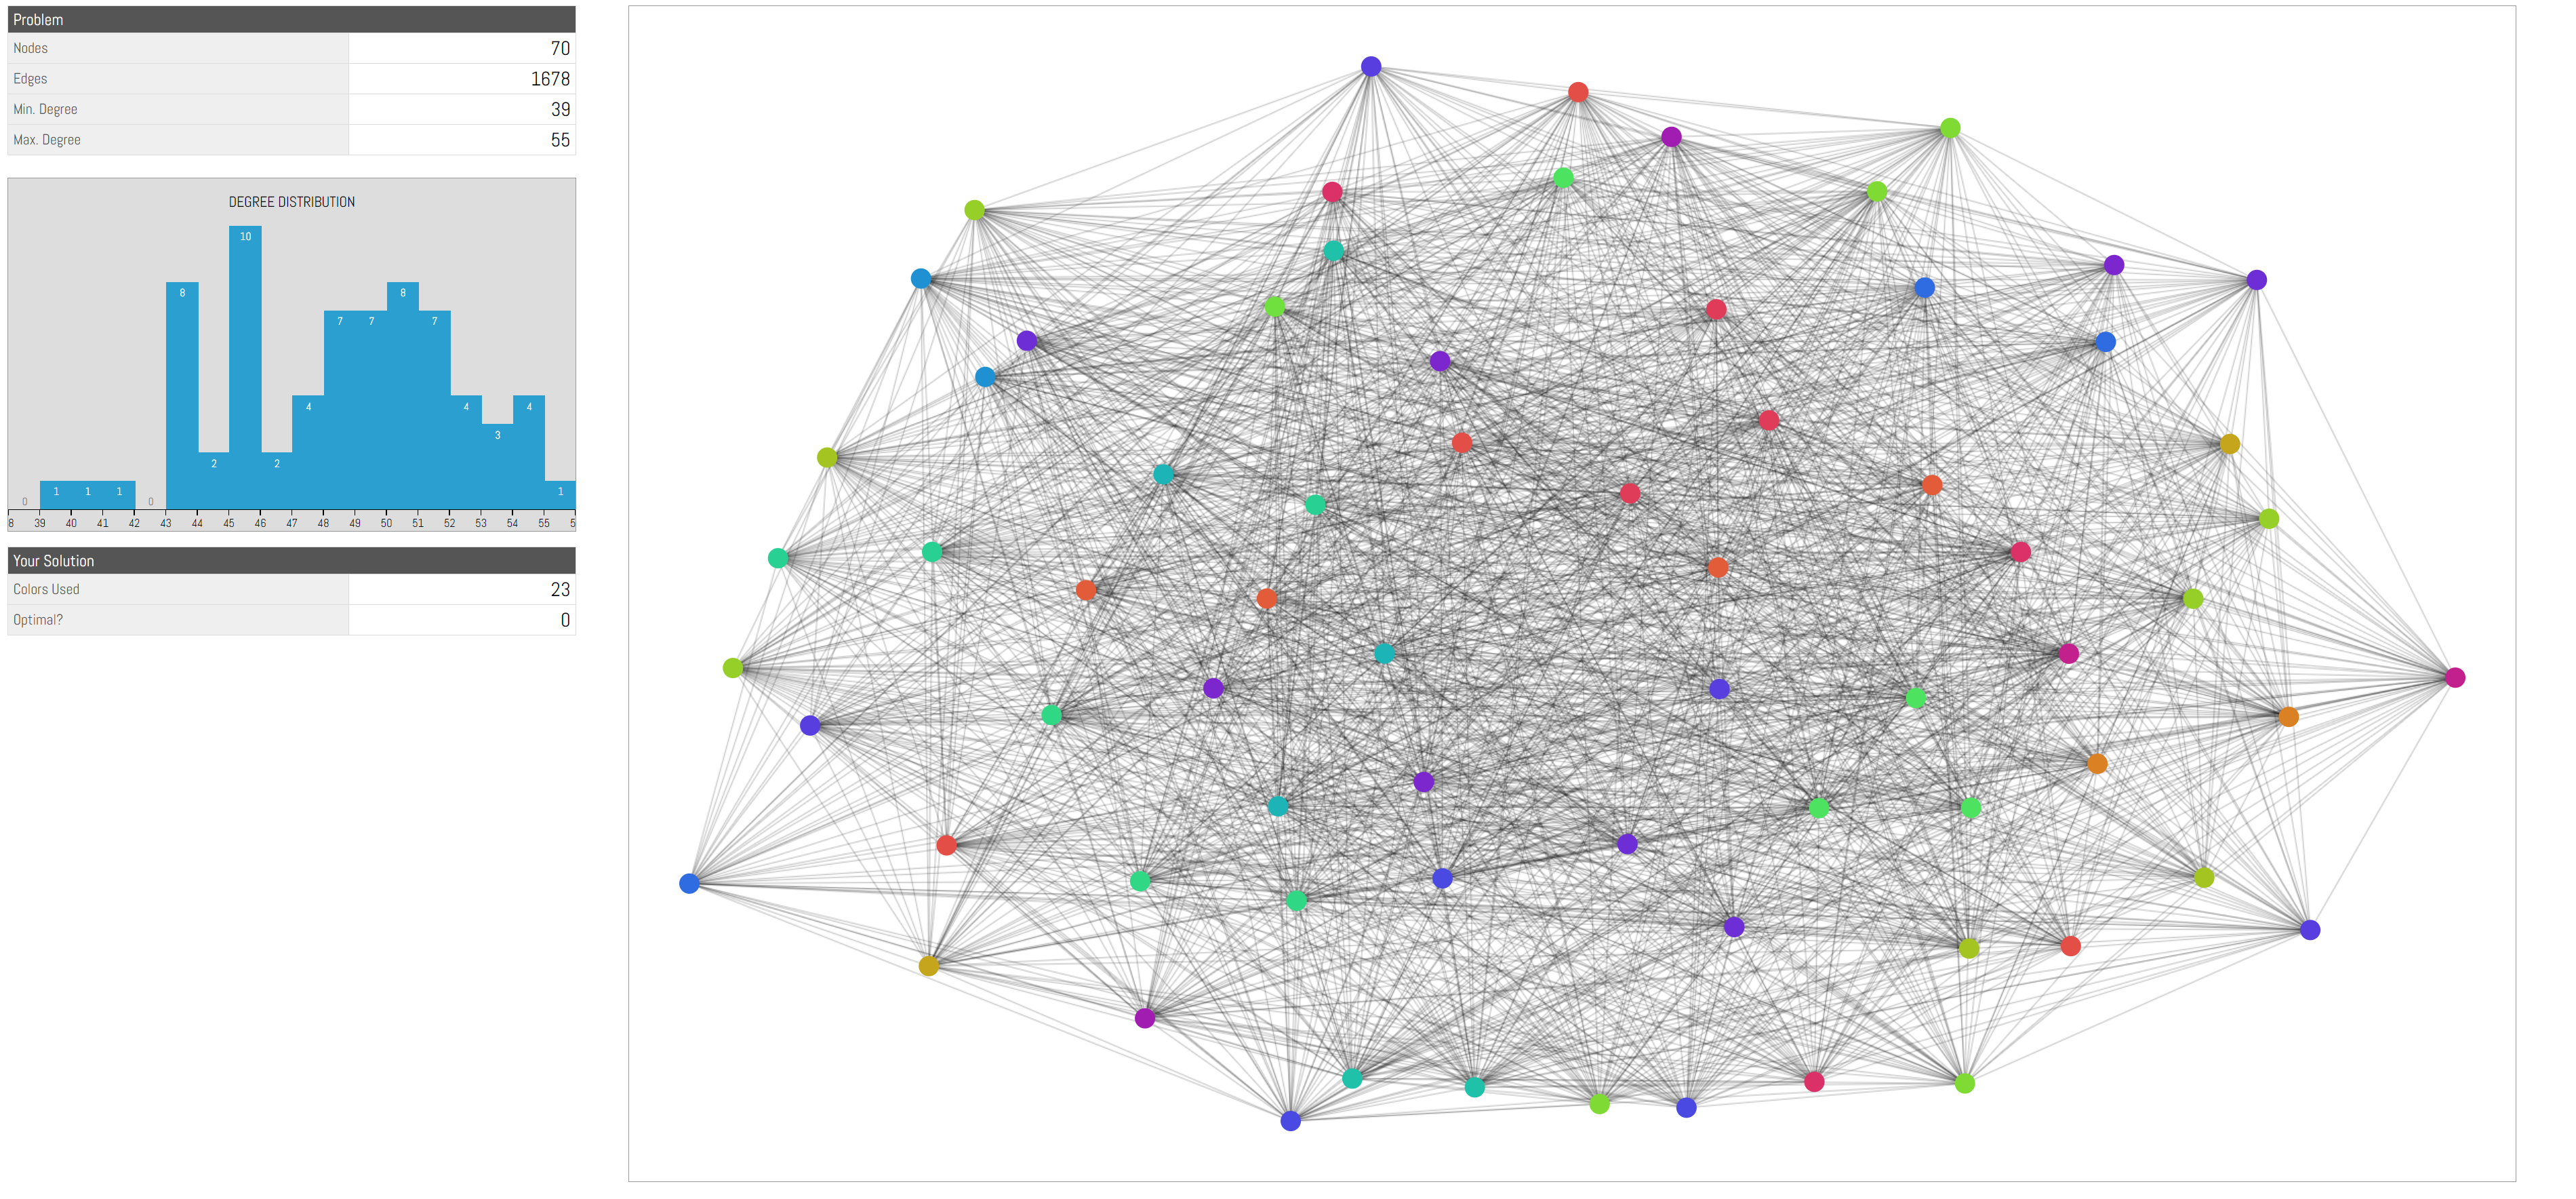

In [5]:
Image(filename='C:/Users/per35/Pictures/coloring.png',width=900, height=900)

As a first step towards this exercise, make sure you install the google-or tools in your system based on 
your system configuration:
    
    Here is the links towards the directory:
        1.https://developers.google.com/optimization/install
    
    $ python -m pip install --upgrade --user ortools

In [7]:
import sys
from ortools.constraint_solver import pywrapcp
# imported the python wrapper of CP from the or tools

After importing the necessar solver from the or tools, lets start defining function which performs the set of tasks for us:

    1. Reading the input data.
    2. Taking the number of colors should be used from user input
    3. Defining the deicison variable 
    4. Writing the constraints such that any given nodes placed side-by-side shouldn't have the same color
    5. Defining the objective function i.e. minimization the number of colors usage

The input data is expected to be in this format:
 
    1000 449735
    0 1
    0 2
    0 3
    0 5
    0 6
    0 7
    . .
    . .
    . .



    1000 refers to nodes, 449735 refers to edges

In [10]:

def solve_it(input_data):
    # Modify this code to run your optimization algorithm

    # parse the input
    lines = input_data.split('\n')

    first_line = lines[0].split()
    node_count = int(first_line[0])
    edge_count = int(first_line[1])
    
    nc =3
    
    edges = []
    for i in range(1, edge_count + 1):
        line = lines[i]
        #print(line)
        parts = line.split()
        #print(parts)
        edges.append([int(parts[0]), int(parts[1])])
        #print(edges)

    #decision variable
    solver  = pywrapcp.Solver('Map coloring')
    
    x = [solver.IntVar(1, nc, 'x[%i]' %i) for i in range(node_count)]
    
    max_color = solver.Max(x).Var()
    
    for i in range(edge_count):
        solver.Add(x[edges[i][0]-1] != x[edges[i][1]-1] )
     

    for i in range(nc):
        solver.Add(x[i] <= i+1);

        
    objective = solver.Minimize(max_color,1) 
    
    solution = solver.Assignment()
    solution.Add(x)
    solution.Add(max_color)
    
    db = solver.Phase(x,
                    # solver.CHOOSE_FIRST_UNBOUND,
                    solver.CHOOSE_MIN_SIZE_LOWEST_MAX,
                    
                    # solver.ASSIGN_MIN_VALUE
                    solver.ASSIGN_MIN_VALUE
                    )


    solver.NewSearch(db, [objective])
    num_solutions = 0
    while solver.NextSolution():
        num_solutions += 1
        print("x:", [int(x[i].Value()) for i in range(node_count)])
        print("max_color:", max_color.Value())
        print()
  
    solver.EndSearch()

    print()
    print("num_solutions:", num_solutions)
    print("failures:", solver.Failures())
    print("branches:", solver.Branches())
    print("WallTime:", solver.WallTime())


    # build a trivial solution
    # every node has its own color
    #solution = [1, 2, 1, 3, 3, 4, 4, 5, 6, 5, 6, 2, 7, 8, 8, 8, 6, 7, 3, 9, 10, 11, 8, 12, 10, 13, 12, 9, 10, 1, 13, 3, 11, 5, 11, 14, 2, 14, 12, 15, 4, 16, 13, 4, 16, 17, 9, 2, 15, 15, 17, 1, 18, 18, 16, 7, 10, 19, 6, 14, 20, 20, 21, 22, 19, 19, 21, 22, 11, 23]

    # prepare the solution in the specified output format
    output_data = str(node_count) + ' ' + str(0) + '\n'
    output_data += ' '.join(map(str, x))
    
 

    return output_data



if __name__ == '__main__':
    import sys
    #if len(sys.argv) > 1:
    #   file_location = sys.argv[1].strip()
    file_location = 'C:/Users/per35/Downloads/coloring/data/gc_4_1'
    with open(file_location, 'r') as input_data_file:
        #print(input_data_file)
        input_data = input_data_file.read()
        print(solve_it(input_data))

x: [1, 2, 2, 2]
max_color: 2


num_solutions: 1
failures: 2
branches: 2
WallTime: 1
4 0
x[0](1..3) x[1](1..3) x[2](1..3) x[3](1..3)
